### `Import Libraries`

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
tf.random.set_seed(42)

In [11]:
tf.__version__

'2.19.0'

### `Classifiction NN`

### `Load the Dataset`

In [12]:
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [13]:
x_train_full.max()

np.uint8(255)

### `Data Processing`

In [14]:
# Normalizing and Transfer datatypes to (float32 & int32, enough for NN)
x_train_full = (x_train_full/255.0).astype('float32')
y_train_full = y_train_full.astype('int32')
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [15]:
x_train_full.max()

np.float32(1.0)

In [16]:
x_test = (x_test/255.0).astype('float32')
y_test = y_test.astype('int32')

### `Split the Dataset`

In [18]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full,
                                                      test_size=0.1, shuffle=True, stratify=y_train_full)

print('X_train shape =>', x_train.shape)
print('y_train shape =>', y_train.shape)

print('----'*10)

print('X_val shape =>', x_valid.shape)
print('y_val shape =>', y_valid.shape)

print('----'*10)

print('X_test shape =>', x_test.shape)
print('y_test shape =>', y_test.shape)

X_train shape => (54000, 28, 28)
y_train shape => (54000,)
----------------------------------------
X_val shape => (6000, 28, 28)
y_val shape => (6000,)
----------------------------------------
X_test shape => (10000, 28, 28)
y_test shape => (10000,)


### `Getting Labels`

In [ ]:
# What about the target
# Each target is represented by numbers , If we plot these matrices according to its numbers
# we will get the corresponding photo to each number , I will do that

In [19]:
x_train[0].shape

(28, 28)

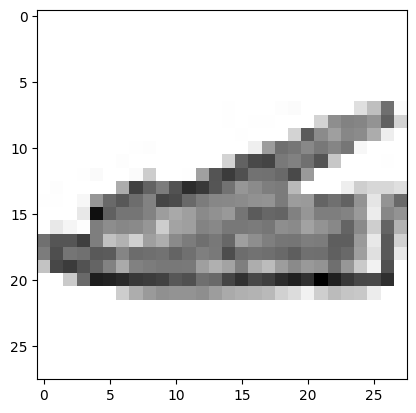

In [21]:
plt.imshow(x_train[0], cmap='binary');

In [22]:
target_only_plot = pd.DataFrame(y_train, columns=['target'])
target_only_plot

,target
0,5
1,2
2,6
3,0
4,2
...,...
53995,2
53996,8
53997,2
53998,7


In [25]:
# Get one unique label with its index in dataset
# Get first unique value only. What this number belong to what photo
img_indicies = {}

for i in range(len(np.unique(y_train))):
  img_indicies[i] = target_only_plot[target_only_plot['target']==i].index[0]
img_indicies

{0: np.int64(3),
 1: np.int64(18),
 2: np.int64(1),
 3: np.int64(16),
 4: np.int64(31),
 5: np.int64(0),
 6: np.int64(2),
 7: np.int64(5),
 8: np.int64(7),
 9: np.int64(19)}

In [26]:
keys = list(img_indicies.keys())
keys

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [27]:
y_train[1]

np.int32(2)

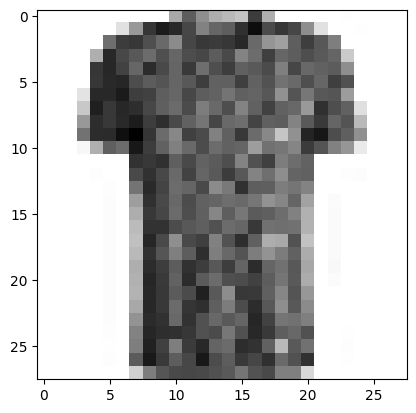

In [28]:
plt.imshow(x_train[img_indicies[0]], cmap='binary');

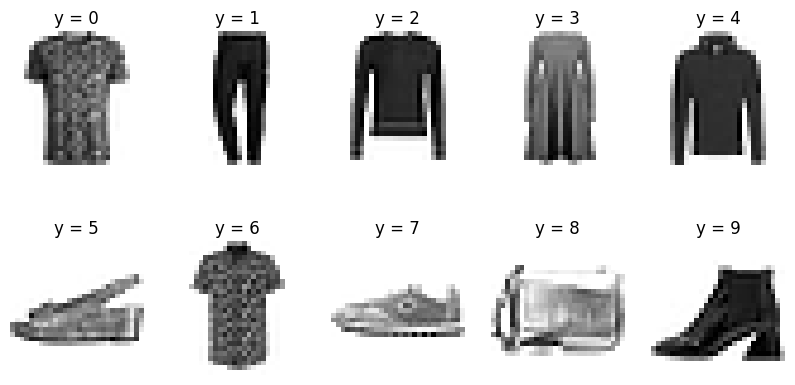

In [33]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5))

label = 0

for row in range(2):
  for col in range(5):
    plt.sca(ax[row, col])
    plt.imshow(x_train[img_indicies[label]], cmap='binary')
    plt.title(f'y = {keys[label]}', fontsize=12, c='k')
    plt.axis('off')
    label += 1

In [34]:
# you can now know for each target value belong to what class
class_names = ['T_Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_Boot']

print('y_train in row 1 -> ', y_train[0])
print('get its corresponding class -> ', class_names[y_train[0]])

y_train in row 1 ->  5
get its corresponding class ->  Sandal


### `Building Sequential Model`

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>]

In [40]:
weights, biases = model.layers[1].get_weights()
weights.shape

(784, 128)

In [41]:
biases.shape

(128,)

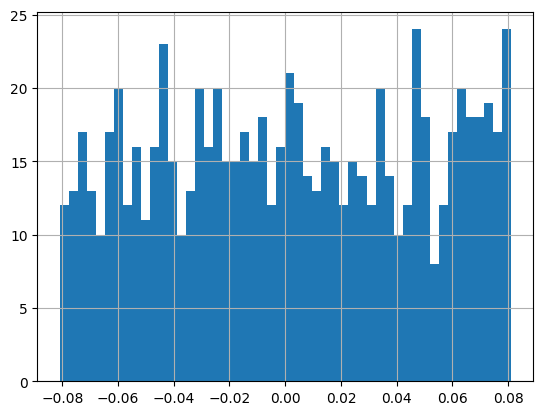

In [43]:
pd.DataFrame(weights).iloc[:, 5].hist(bins=50);

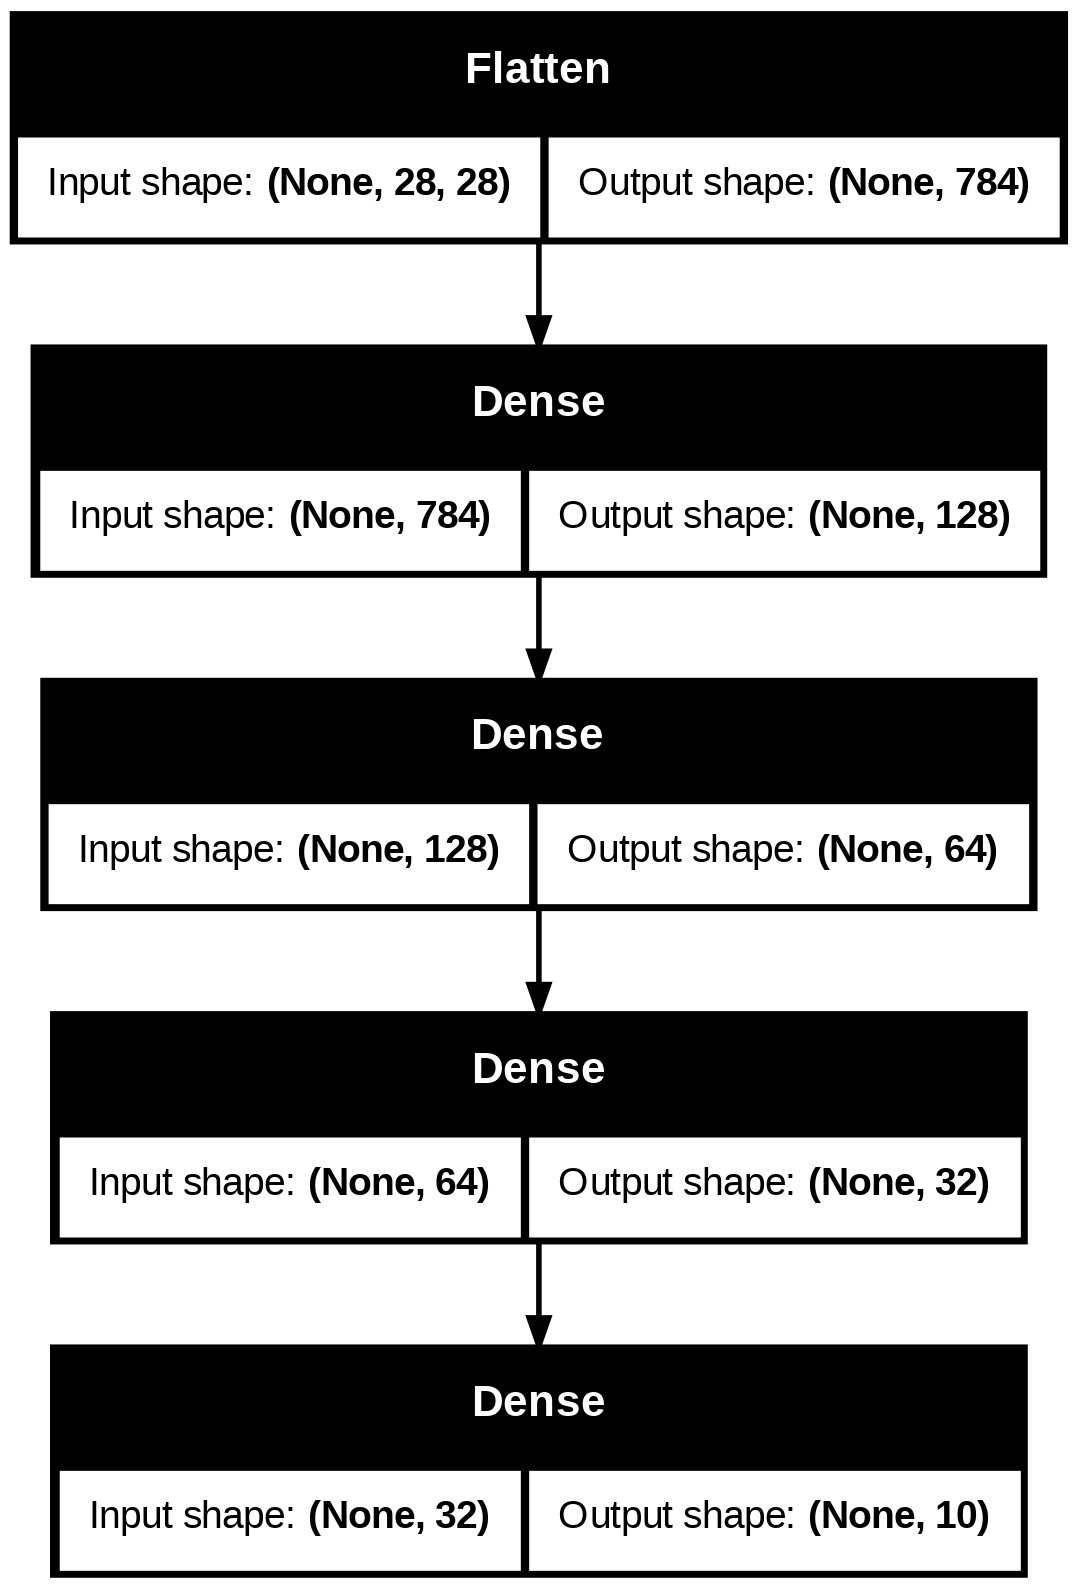

In [44]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [46]:
 tf.keras.optimizers.SGD()

In [51]:
from sklearn.base import validate_data
from IPython.core import history
from sklearn import metrics
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=7, restore_best_weights=True)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid), epochs=20, batch_size=32,
                    callbacks=[early_stop])

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8371 - loss: 0.4592 - val_accuracy: 0.8330 - val_loss: 0.4826
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8502 - loss: 0.4245 - val_accuracy: 0.8433 - val_loss: 0.4508
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8583 - loss: 0.3996 - val_accuracy: 0.8525 - val_loss: 0.4275
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8660 - loss: 0.3803 - val_accuracy: 0.8573 - val_loss: 0.4119
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8703 - loss: 0.3644 - val_accuracy: 0.8615 - val_loss: 0.4005
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8738 - loss: 0.3511 - val_accuracy: 0.8653 - val_loss: 0.3903
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8781 - loss: 0.3395 - val_accuracy: 0.8677 - val_loss: 0.3850
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8816 - loss: 0.3292 - 

In [52]:
history.history

{'accuracy': [0.8393148183822632,
  0.8502963185310364,
  0.8582592606544495,
  0.864481508731842,
  0.8696110844612122,
  0.8728518486022949,
  0.8770925998687744,
  0.8801666498184204,
  0.8827221989631653,
  0.88612961769104,
  0.8886481523513794,
  0.8910925984382629,
  0.8934814929962158,
  0.8952222466468811,
  0.8970184922218323,
  0.8989814519882202,
  0.9009259343147278,
  0.9029259085655212,
  0.9046851992607117,
  0.9069814682006836],
 'loss': [0.45492181181907654,
  0.4237600564956665,
  0.40092733502388,
  0.3829168379306793,
  0.3678368926048279,
  0.35504263639450073,
  0.34362146258354187,
  0.3334362804889679,
  0.3245827257633209,
  0.31639978289604187,
  0.30852872133255005,
  0.30154791474342346,
  0.2948317229747772,
  0.28848645091056824,
  0.2824857234954834,
  0.2768275737762451,
  0.27099117636680603,
  0.26552942395210266,
  0.26027408242225647,
  0.2550314962863922],
 'val_accuracy': [0.8330000042915344,
  0.8433333039283752,
  0.8525000214576721,
  0.8573333

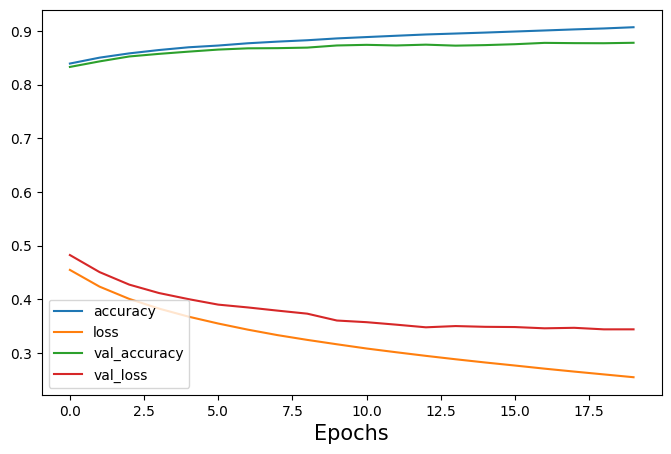

In [53]:
# Plotting History Results
history_info = history.history
pd.DataFrame(history_info).plot(figsize=(8, 5))
plt.xlabel('Epochs', fontsize=15)
plt.legend(loc='lower left')
plt.show()

### `Evaluating`

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Labels:  [9 2 1]

Predicted Class Names:  ['Ankle_Boot', 'Pullover', 'Trouser']


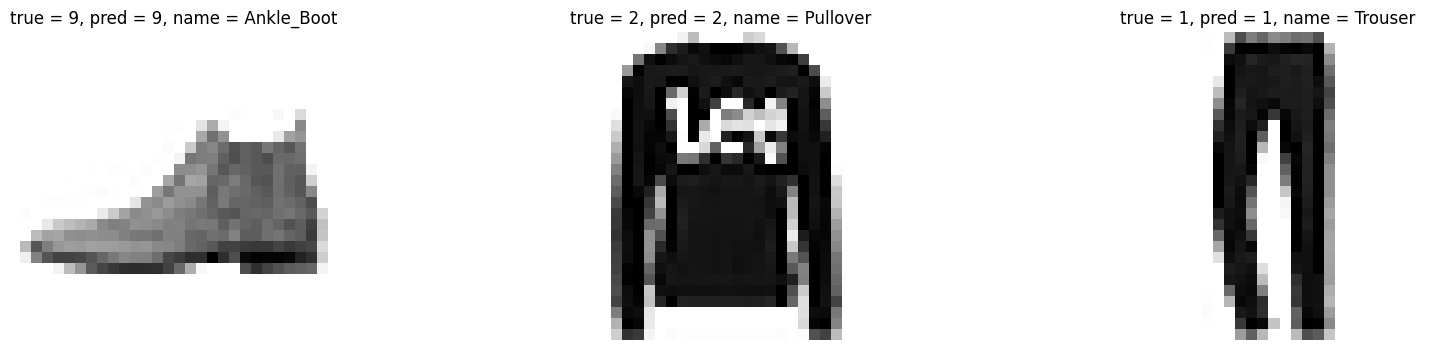

In [56]:
x_new = x_test[:3]
y_new = y_test[:3]

y_pred_new = np.argmax(model.predict(x_new), axis=-1)
print('Predicted Labels: ', y_pred_new)
print()

y_pred_names = [class_names[y_pred_new[i]] for i in range(len(y_pred_new))]
print('Predicted Class Names: ', y_pred_names)

print('==='*25)
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

plt.sca(ax[0])
plt.imshow(x_new[0], cmap='binary')
plt.title(f'true = {y_new[0]}, pred = {y_pred_new[0]}, name = {y_pred_names[0]}')
plt.axis('off')
plt.sca(ax[1])
plt.imshow(x_new[1], cmap='binary')
plt.title(f'true = {y_new[1]}, pred = {y_pred_new[1]}, name = {y_pred_names[1]}')
plt.axis('off')
plt.sca(ax[2])
plt.imshow(x_new[2], cmap='binary')
plt.title(f'true = {y_new[2]}, pred = {y_pred_new[2]}, name = {y_pred_names[2]}')
plt.axis('off');

In [57]:
# dump some test images
import os
from PIL import Image

for i, img_array in enumerate(x_test[:3]):
  img_array = (img_array * 255).astype(np.uint8)
  img = Image.fromarray(img_array)
  output_path = os.path.join(".", f'test_image_{i}.png')
  img.save(output_path)

In [62]:
# dump model
model.save("model.keras")

----------------

In [63]:
import tensorflow as tf
import numpy as np
from PIL import Image

In [64]:
# Load model
model = tf.keras.models.load_model('model.keras')
class_names = ['T_Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_Boot']

In [65]:
def inference(image_path: str):
    # Open and preprocess the image
    img = Image.open(image_path)
    if img.mode != 'L':
        img = img.convert('L')

    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    # Reshape for model input
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array, verbose=0)
    predicted_class = np.argmax(prediction, axis=-1)[0]
    predicted_name = class_names[predicted_class]
    print(prediction)
    return {
        'class_index': int(predicted_class),
        'class_name': predicted_name,
        'confidence': float(prediction[0][predicted_class] * 100)
    }


# example
inference(image_path="/content/test_image_1.png")

[[1.20881785e-04 4.10735694e-08 9.20055330e-01 1.26141657e-07
  5.08563556e-02 1.52613852e-10 2.89650336e-02 3.57382735e-11
  2.17948354e-06 9.70066041e-13]]


{'class_index': 2, 'class_name': 'Pullover', 'confidence': 92.00553131103516}

-------------